# Digits recognization (logistic regression)

The goal of this part is to introduce how to use databases with the famous python packages named Sklearn.
In this TP, you will made a AI model that recognize handwritten digits.

![alt text](images/digit1.png "Title")

# 1.Importing database

First, you will need to install the sklearn packages, to do that, you can run the command: pip install package_name in your terminal.

After we will load an existing database of handwritten digits. 

Has often, we will use the famous numpy packages.

In [2]:
import numpy as np
import sklearn as sk
from sklearn import datasets

digits = datasets.load_digits()

# 2.Database information

Database is dictonnary composed of many informations that you can see by running

In [3]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


- `data` is the array of all of images. An image, here, is represented as an array of float of lenght 64 corresponding to a 8x8 images of nuances of grey.
- `images` is the array of all of images in an other format. An image, here, is represented as an matrix of float of size 8x8 to a 8x8 images of nuances of grey.
- `target` is the array of target value of each images, i.e., the digit represented by the image.
- `taget_names` Is  the array of all possible outcomes of value. Here it is the array `[0 1 2 3 4 5 6 7 8 9]`

Remember that to access the size of an numpy array you can use the method .shape

In [4]:
print(digits.data.shape)

(1797, 64)


This means that `digits.data` is a matrix of size 1797x64

# 3.Data visualisation

We will use the matplotlib.pyplot package to render images of the database.

TODO: Create a function to render a single image from the database.

### Hint:

Use the matplotlib.pyplot function called `imshow()`

### Solution

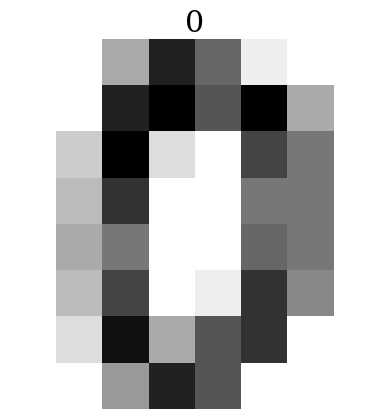

In [5]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif', size='18') #Just changing title policy

def show_image(i):
    # plot the i-th image of the database
    plt.imshow(digits.images[i],cmap='binary')
    plt.title(digits.target[i])
    plt.axis('off')
    plt.show()

show_image(0)

# 4.Splitting dataset

We need to split the trainning into two parts: 
- the tranining part (often around 80% of the database)
- the test part (so often 20% of the database)

In [6]:
import random as rd
from sklearn.model_selection import train_test_split

random_seed = rd.randint(0,4294967295)
trainning_size = 0.8
# Splitting dataset into 2 parts: trainning and test
res = train_test_split(digits.data, digits.target,
                        train_size=trainning_size, test_size=1-trainning_size,
                        random_state=random_seed)
train_data, test_data, train_labels, test_labels = res

print("dataset training:", train_data.shape)
print("dataset test    :", test_data.shape)

dataset training: (1437, 64)
dataset test    : (360, 64)


If you do not use a random seed, the `res` variable will always be the same. More specifically, the random seed randomized the choice of the `train_data` set and `test_data` is the complementary of `train_data`.

The value `4294967295` is the maximal possible value for random seed for the `train_test_split()` function.

`train_data` represent 80% of the dataset, train_labels is the target corresponding to the train_data set.

`test_data` represent the last 20% of the dataset, test_labels is the target corresponding to the test_data set.

# 5.Trainning existing AI model

The last step is to use a AI model from the sklearn wich is the logistic regression.

TODO: Train a logistic regression model with the `train_data` set. Then output the score of your model on the `train_data` set and on the `test_data` set.

### Solution

In [7]:
# Import the logistic regression model
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=200)

# Train the model with the train_data
model.fit(train_data, train_labels)

# Print the score
print("Training score:", model.score(train_data, train_labels))
print("Test score:    ", model.score(test_data, test_labels))

Training score: 1.0
Test score:     0.975


`model.score(data_set, data_label)` output the ratio of success on the `data_set` set.

You can visualize those results with the next code cell. More specifically, since the model is pretty good, we highlight only the errors of the logistic regression model on test dataset.

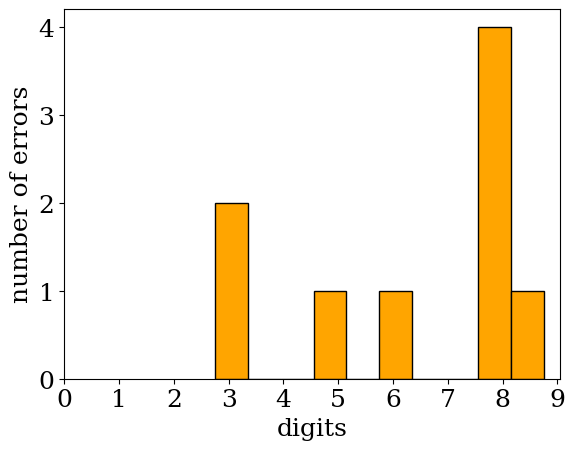

In [31]:
errors = []
for i in range(len(test_data)):
    result = model.predict([test_data[i]])[0]
    if result != test_labels[i]:
        errors.append(test_labels[i])

arr = np.array(errors)-0.25 # applying -0.25 to each errors so that the histogram his align with the integer
plt.hist(arr, color='orange', edgecolor='black') # Create histogram bars
plt.xticks(range(10)) # ploting every interger in x axis
plt.xlabel("digits")
plt.ylabel("number of errors")
plt.show()


# Explanation of logistic regression

explanataion...